# Introduction to Time Series Analysis in Python - Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Correlation and Autocorrelation

### A "Thin" Application of Time Series

In [2]:
diet = pd.read_csv('../datasets/google trends/diet.csv', index_col=0)
diet.head()

,diet: (All world)
Week,
2013-08-18,73
2013-08-25,72
2013-09-01,76
2013-09-08,73
2013-09-15,72


In [3]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 2013-08-18 to 2018-08-05
Data columns (total 1 columns):
diet: (All world)    260 non-null int64
dtypes: int64(1)
memory usage: 4.1+ KB


In [4]:
# Rename index and columns
diet.columns = ['diet']
diet.index.name = 'Date'

In [5]:
diet.head()

,diet
Date,
2013-08-18,73
2013-08-25,72
2013-09-01,76
2013-09-08,73
2013-09-15,72


In [12]:
# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

In [13]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2013-08-18 to 2018-08-05
Data columns (total 1 columns):
diet    260 non-null int64
dtypes: int64(1)
memory usage: 4.1 KB


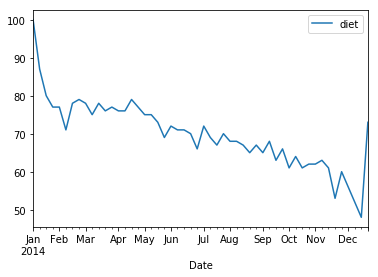

In [14]:
# Plot 2014 data using slicing
diet['2014'].plot()
plt.show()

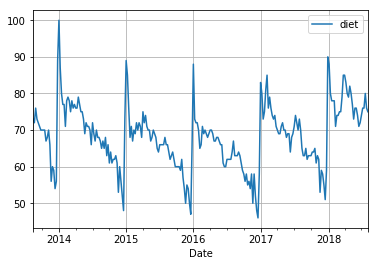

In [15]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

### Merging Time Series With Different Dates

In [16]:
stocks = pd.read_csv('../datasets/stock/SP500.csv', index_col=0, parse_dates=['DATE'], na_values='.')
stocks.dropna(inplace=True)
stocks.head()

,SP500
DATE,
2008-08-13,1285.83
2008-08-14,1292.93
2008-08-15,1298.20
2008-08-18,1278.60
2008-08-19,1266.69


In [17]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2008-08-13 to 2018-08-13
Data columns (total 1 columns):
SP500    2518 non-null float64
dtypes: float64(1)
memory usage: 39.3 KB


In [18]:
bonds = pd.read_csv('../datasets/stock/DGS10.csv', index_col=0, parse_dates=['DATE'], \
                    names=['DATE', 'US10Y'], skiprows=1, na_values='.')
bonds.dropna(inplace=True)
bonds.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [19]:
bonds = bonds.loc['2008-08-13':]
bonds.head()

,US10Y
DATE,
2008-08-13,3.94
2008-08-14,3.89
2008-08-15,3.84
2008-08-18,3.82
2008-08-19,3.83


In [20]:
bonds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2504 entries, 2008-08-13 to 2018-08-14
Data columns (total 1 columns):
US10Y    2504 non-null float64
dtypes: float64(1)
memory usage: 39.1 KB


In [21]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

In [22]:
# Take the difference between the sets and print
len(set_stock_dates - set_bond_dates)

19

In [23]:
# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner')
stocks_and_bonds.head(10)

,SP500,US10Y
DATE,,
2008-08-13,1285.83,3.94
2008-08-14,1292.93,3.89
2008-08-15,1298.20,3.84
2008-08-18,1278.60,3.82
2008-08-19,1266.69,3.83
2008-08-20,1274.54,3.79
2008-08-21,1277.72,3.84
2008-08-22,1292.20,3.87
2008-08-25,1266.84,3.79


### Correlation of Stocks and Bonds
Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

In [24]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()
returns.head(10)

,SP500,US10Y
DATE,,
2008-08-13,NaN,NaN
2008-08-14,0.005522,-0.012690
2008-08-15,0.004076,-0.012853
2008-08-18,-0.015098,-0.005208
2008-08-19,-0.009315,0.002618
2008-08-20,0.006197,-0.010444
2008-08-21,0.002495,0.013193
2008-08-22,0.011333,0.007812
2008-08-25,-0.019625,-0.020672


In [25]:
# Compute correlation using corr()
correlation = returns.SP500.corr(returns.US10Y)
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:  0.394846994856


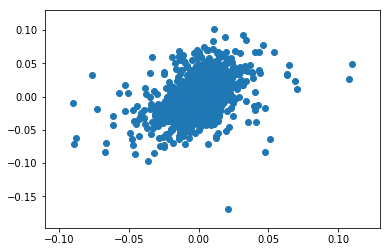

In [26]:
# Make scatter plot
plt.scatter(returns.SP500, returns.US10Y)
plt.show()

### Flying Saucers Aren't Correlated to Flying Markets
Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

In [27]:
ufo = pd.read_csv('../datasets/nuforc/ufo-datacamp.csv', index_col=0)
ufo.head()

,UFO
Date,
1906,1
1910,2
1916,1
1920,1
1925,1


In [28]:
dji = pd.read_csv('../datasets/stock/DJI.csv', index_col=0)
dji.head()

,DJI
Date,
1941,110.96
1942,119.40
1943,135.89
1944,152.32
1945,192.91


In [29]:
levels = ufo.join(dji, how='inner')
levels.head()

,UFO,DJI
Date,,
1941,1,110.96
1942,2,119.40
1943,9,135.89
1944,9,152.32
1945,9,192.91


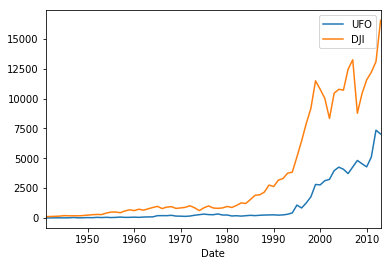

In [30]:
levels.plot()
plt.show()

In [31]:
# Compute correlation of levels
correlation1 = levels.DJI.corr(levels.UFO)
print("Correlation of levels: ", correlation1)

Correlation of levels:  0.939976221073


In [32]:
# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes.DJI.corr(changes.UFO)
print("Correlation of changes: ", correlation2)

Correlation of changes:  0.0602693546241


### Looking at a Regression's R-Squared

Simple Linear Regression = Ordinary Least Squares Regression (OLS)
* statsmodel.api.OLS(y, x).fit()
* numpy.polyfit(x, y, deg=1)
* pandas.ols(y, x)
* scipy.stats.linregress(x, y)

In [33]:
# Compute correlation of x and y
regres = returns.dropna()

In [34]:
# Add a constant to the DataFrame
regres = sm.add_constant(regres)
regres.head()

,const,SP500,US10Y
DATE,,,
2008-08-14,1.0,0.005522,-0.012690
2008-08-15,1.0,0.004076,-0.012853
2008-08-18,1.0,-0.015098,-0.005208
2008-08-19,1.0,-0.009315,0.002618
2008-08-20,1.0,0.006197,-0.010444


In [35]:
# Fit the regression of y on x
result = sm.OLS(regres['US10Y'], regres[['const', 'SP500']]).fit()

In [36]:
# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  US10Y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     461.0
Date:                Thu, 16 Aug 2018   Prob (F-statistic):           5.53e-94
Time:                        21:26:30   Log-Likelihood:                 6098.0
No. Observations:                2498   AIC:                        -1.219e+04
Df Residuals:                    2496   BIC:                        -1.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.343      0.7

#### Relation between R-Squared and Correlation
R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.
* const is the intercept of regression
* SP599 is the slope of regression
* $corr^2$ = R-squared => corr = $\sqrt{R^2}$
* sign(corr) = sign(regression slope)

### A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see here (https://www.quantopian.com/posts/enhancing-short-term-mean-reversion-strategies-1).

In [37]:
MSFT = pd.read_csv('../datasets/stock/MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index)
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [38]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W', how='last')
MSFT.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091


In [39]:
# Compute the percentage change of prices
returns = MSFT.pct_change()

In [40]:
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


### Are Interest Rates Autocorrelated?
When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

In [41]:
DGS = pd.read_csv('../datasets/stock/DGS10.csv', index_col=0, na_values='.')
DGS.index = pd.to_datetime(DGS.index)
DGS.dropna(inplace=True)
DGS.head()

,DGS10
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [42]:
# Compute the daily change in interest rates 
DGS['change_rates'] = DGS.diff()

In [43]:
# Compute and print the autocorrelation of daily changes
autocorrelation_daily = DGS['change_rates'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

The autocorrelation of daily interest rate changes is 0.07


In [44]:
# Convert the daily data to annual data
annual_data = DGS['DGS10'].resample(rule='A', how='last')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


In [45]:
# Repeat above for annual data
annual_data['diff_rates'] = annual_data.diff()
autocorrelation_annual = annual_data['diff_rates'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_annual))

The autocorrelation of annual interest rate changes is -0.22
